# Extension Analysis with fermipy

This tutorial demonstrates how to run a basic extension analysis with the [fermipy](http://fermipy.readthedocs.org) package.  This tutorial assumes that you have first gone through the PG 1553 analysis tutorial.  Additional documentation on running extension analysis is available here.

## Get the Data

For this thread we will use a pregenerated data set which is contained in the following tar archive.

In [1]:
!wget -nc http://www.slac.stanford.edu/~mdwood/fermipy/ic443.tar.gz
!tar xzf ic443.tar.gz

File ‘ic443.tar.gz’ already there; not retrieving.



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis('ic443/config.yaml')
gta.setup()

/Users/mdwood/src/ScienceTools/x86_64-apple-darwin14.3.0/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
2015-11-10 12:26:51 - GTAnalysis - INFO - 
--------------------------------------------------------------------------------
This is fermipy version 0.5.0-27-g1913-dirty.
2015-11-10 12:26:51 - GTAnalysis - INFO - Configuration:
binning:
  binsperdec: 8
  binsz: 0.05
  coordsys: GAL
  enumbins: null
  npix: null
  proj: AIT
  roiwidth: 6.0
components: null
data:
  evfile: ic443_ft1.fits
  ltcube: ltcube_239557414_428903014_z090_r180_gti.fits
  scfile: null
extension:
  fix_background: false
  save_model_map: false
  save_templates: false
  spatial_model: GaussianSource
  width: null
  width_max: 1.0
  width_min: 0.00316
  width_nstep: 26
fileio:
  logfile: /Users/mdwood/fermi/

Plotter is MatPlotlib


## Print the ROI model

We can print the ROI object to see a list of sources in the model along with their distance from the ROI center (offset), TS, and number of predicted counts (Npred).  Since we haven't yet fit any sources, the ts of all sources will initially be assigned as nan.

In [3]:
print gta.roi

name                      SpatialModel    SpectrumType        offset           ts        Npred
----------------------------------------------------------------------------------------------------
3FGL J0617.2+2234e        SpatialMap      LogParabola          0.000          nan     11299.78
3FGL J0619.4+2242         PointSource     PowerLaw             0.536          nan       248.72
3FGL J0609.3+2131         PointSource     LogParabola          2.105          nan       355.95
3FGL J0609.2+2051c        PointSource     PowerLaw             2.524          nan       165.02
3FGL J0621.0+2514         PointSource     PowerLaw             2.804          nan       172.85
3FGL J0611.5+1957         PointSource     PowerLaw             2.931          nan       204.82
3FGL J0603.8+2155         PointSource     PowerLaw             3.166          nan        63.75
3FGL J0628.4+2429         PointSource     PowerLaw             3.214          nan        15.47
3FGL J0605.9+2039c        PointSource     Po

Now we will run the optimize() method.  This will automatically re-fit all sources in the ROI and give us baseline model that we can use as a starting point for subsequent stages of the analysis.

In [4]:
gta.optimize()

2015-11-10 12:27:35 - GTAnalysis - INFO - Running ROI Optimization
2015-11-10 12:27:35 - GTAnalysis - INFO - LogLike: -49037.403165
2015-11-10 12:27:35 - GTAnalysis - INFO - Freeing parameters for galdiff               : ['Prefactor']
2015-11-10 12:27:35 - GTAnalysis - INFO - Freeing parameters for 3FGL J0617.2+2234e    : ['norm']
2015-11-10 12:27:35 - GTAnalysis - INFO - Freeing parameters for isodiff               : ['Normalization']
2015-11-10 12:27:37 - GTAnalysis - INFO - Fit iteration: 0
2015-11-10 12:27:40 - GTAnalysis - INFO - Generating source dict for 3FGL J0617.2+2234e
2015-11-10 12:27:44 - GTAnalysis - INFO - Generating source dict for galdiff
2015-11-10 12:27:47 - GTAnalysis - INFO - Generating source dict for isodiff
2015-11-10 12:27:51 - GTAnalysis - INFO - Fit returned successfully.
2015-11-10 12:27:51 - GTAnalysis - INFO - Fit Quality: 3 LogLike:   -49021.501
2015-11-10 12:27:51 - GTAnalysis - INFO - Fixing parameters for 3FGL J0617.2+2234e    : ['norm']
2015-11-10 12:

In [5]:
print gta.roi

name                      SpatialModel    SpectrumType        offset           ts        Npred
----------------------------------------------------------------------------------------------------
3FGL J0617.2+2234e        SpatialMap      LogParabola          0.000     34222.51     10887.76
3FGL J0619.4+2242         PointSource     PowerLaw             0.536        40.76       192.29
3FGL J0609.3+2131         PointSource     LogParabola          2.105        50.24       205.36
3FGL J0609.2+2051c        PointSource     PowerLaw             2.524        31.65       118.98
3FGL J0621.0+2514         PointSource     PowerLaw             2.804        81.48       140.35
3FGL J0611.5+1957         PointSource     PowerLaw             2.931        15.84        77.49
3FGL J0603.8+2155         PointSource     PowerLaw             3.166        37.61        70.31
3FGL J0628.4+2429         PointSource     PowerLaw             3.214         1.33        16.42
3FGL J0605.9+2039c        PointSource     Po

To check the quality of the ROI model fit we can use the residmap method.  This will generate maps of the smoothed counts and residuals (counts-model) using a given spatial kernel.

In [64]:
o = gta.residmap('ic443_roifit',
                models=[{'SpatialModel' : 'PointSource', 'Index' : 2.0},
                       {'SpatialModel' : 'PointSource', 'Index' : 1.5}])

2015-11-10 15:27:52 - GTAnalysis - INFO - Generating residual maps
2015-11-10 15:27:52 - ResidMapGenerator - INFO - Generating Residual map
2015-11-10 15:27:52 - ResidMapGenerator - INFO - {'Index': 2.0, 'SpatialModel': 'PointSource'}
2015-11-10 15:27:52 - GTAnalysis - INFO - Adding source testsource
2015-11-10 15:27:52 - ROIModel - INFO - Creating source testsource
2015-11-10 15:27:53 - ROIModel - INFO - Creating source testsource
2015-11-10 15:27:56 - GTAnalysis - INFO - Deleting source testsource
2015-11-10 15:27:56 - GTBinnedAnalysis - INFO - Deleting source testsource
2015-11-10 15:28:02 - ResidMapGenerator - INFO - Generating Residual map
2015-11-10 15:28:02 - ResidMapGenerator - INFO - {'Index': 1.5, 'SpatialModel': 'PointSource'}
2015-11-10 15:28:02 - GTAnalysis - INFO - Adding source testsource
2015-11-10 15:28:02 - ROIModel - INFO - Creating source testsource
2015-11-10 15:28:02 - ROIModel - INFO - Creating source testsource
2015-11-10 15:28:05 - GTAnalysis - INFO - Deleting 

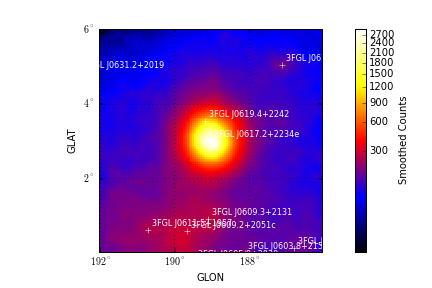

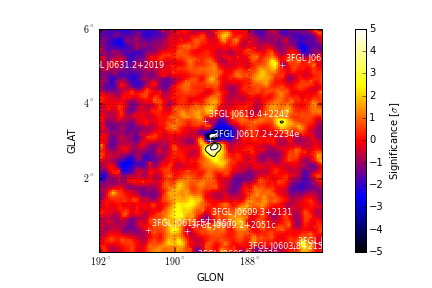

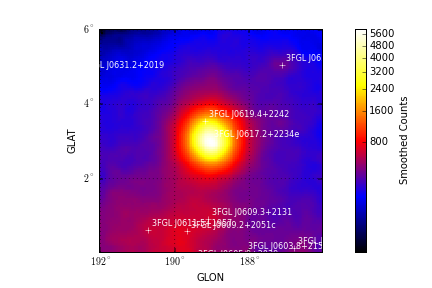

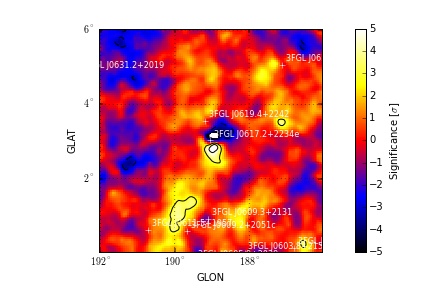

In [65]:
from IPython.display import Image, display
import glob

for f in glob.glob('ic443/ic443_roifit*png'):
    display(Image(f))

## Measuring Source Extension

After optimizing the model we are ready to run an extension analysis on IC 443.  As reported in [Abdo et al. 2010](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1002.2198), this source has a spatial extension of 0.27 deg $\pm$ 0.01 (stat).  We can run an extension test of this source by calling the *extension* method with the source name.  The extension method has a number of options which can be used to modify its behavior.  To see the default settings we can look at the extension sub-dictionary of the config property of our GTAnalysis instance.

In [10]:
import pprint
pprint.pprint(gta.config['extension'])

{'fix_background': False,
 'save_model_map': False,
 'save_templates': False,
 'spatial_model': 'GaussianSource',
 'width': None,
 'width_max': 1.0,
 'width_min': 0.00316,
 'width_nstep': 26}


By default the method will use a 2D Gaussian source template and scan the width parameter between 0.00316 and 1 degrees in 26 steps.  The *width* parameter can be used to override this default behavior by providing an explicit  vector of points for the scan.  Since we know the extension of IC 443 is well localized around 0.27 deg we use a width vector centered around this point.  The analysis results are returned as an output dictionary and are also written to the internal source object of the GTAnalysis instance.

In [55]:
ext_gauss = gta.extension('ic443',width=np.linspace(0.25,0.30,21))
gta.write_roi('ext_gauss_fit')

2015-11-10 15:09:37 - GTAnalysis - INFO - Running extension analysis for 3FGL J0617.2+2234e
2015-11-10 15:09:37 - GTAnalysis - INFO - Freeing parameters for 3FGL J0617.2+2234e    : ['norm']
2015-11-10 15:09:39 - GTAnalysis - INFO - Fit iteration: 0
2015-11-10 15:09:39 - GTAnalysis - INFO - Fit returned successfully.
2015-11-10 15:09:39 - GTAnalysis - INFO - Fit Quality: 3 LogLike:   -48975.148
2015-11-10 15:09:39 - GTBinnedAnalysis - INFO - Generating model map for component 00.
2015-11-10 15:09:42 - GTAnalysis - INFO - Fixing parameters for 3FGL J0617.2+2234e    : ['norm']
2015-11-10 15:09:42 - GTAnalysis - INFO - Adding point-source
2015-11-10 15:09:42 - GTAnalysis - INFO - Adding source 3FGL J0617.2+2234e_ptsrc
2015-11-10 15:09:44 - GTAnalysis - INFO - Generating source dict for 3FGL J0617.2+2234e_ptsrc
2015-11-10 15:09:48 - GTAnalysis - INFO - Fit iteration: 0
2015-11-10 15:09:49 - GTAnalysis - INFO - Fit returned successfully.
2015-11-10 15:09:49 - GTAnalysis - INFO - Fit Quality:

To inspect the results of the analysis we can make a plot of the likelihood profile.  From this we can see that the spatial extension is in good agreement with the value from Abdo et al. 2010.  

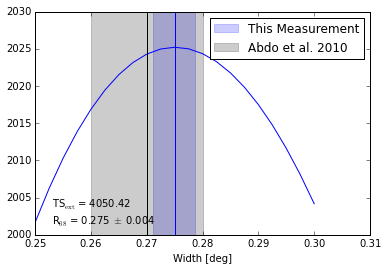

In [58]:
plt.figure()
plt.plot(ext_gauss['width'],ext_gauss['dlogLike'])
plt.gca().set_xlabel('Width [deg]')
plt.gca().axvline(ext_gauss['ext'])
plt.gca().axvspan(ext_gauss['ext']-ext_gauss['ext_err_lo'],ext_gauss['ext']+ext_gauss['ext_err_hi'],
                      alpha=0.2,label='This Measurement',color='b')

plt.gca().axvline(0.27,color='k')
plt.gca().axvspan(0.27-0.01,0.27+0.01,alpha=0.2,label='Abdo et al. 2010',color='k')

plt.annotate('TS$_{\mathrm{ext}}$ = %.2f\nR$_{68}$ = %.3f $\pm$ %.3f'%
            (ext_gauss['ts_ext'],ext_gauss['ext'],ext_gauss['ext_err']),xy=(0.05,0.05),xycoords='axes fraction')
plt.gca().legend()

## Start the analysis

Next, you create an analysis script and run the setup steps which include running the selections and generating exposure maps etc.  This will take a bit.

This is where the magic happens.  fermipy will load the point source model, create your xml file for you, decide on all the appropriate cuts and binnings and just go.  All of this is configurable from python or from the config file.  And, if you need to rerun things, it's smart enough to not overwrite files if it doesn't need to.

### Load up some useful modules

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Import the GTAnalysis module from fermipy

You start by importing the module and then creating an instance of the analysis object from our config file.  When that happens, it spits out a bunch of information about all of the parameters that were used.  You can see there are many more optinos than the ones we chose.

In [3]:
from fermipy.gtanalysis import GTAnalysis

Plotter is MatPlotlib


### The setup routine

This gets everything ready for the likelihood anlaysis.

## Do the likelihood fitting

Now that all of the ancillary files have been generated, we can move on to the actual fitting.  The first thing you should do is free some of the sources since all of the sources are initially fixed.  We'll just free those sources in the center region.

In [6]:
# Free Normalization of all Sources within 3 deg of ROI center
gta.free_sources(distance=3.0,pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta.free_source('galdiff')
gta.free_source('isodiff')

2015-11-04 14:48:05 - GTAnalysis - INFO - Freeing parameters for 3FGL J1555.7+1111     : ['norm']
INFO:GTAnalysis:Freeing parameters for 3FGL J1555.7+1111     : ['norm']
2015-11-04 14:48:05 - GTAnalysis - INFO - Freeing parameters for 3FGL J1553.5+1256     : ['norm']
INFO:GTAnalysis:Freeing parameters for 3FGL J1553.5+1256     : ['norm']
2015-11-04 14:48:05 - GTAnalysis - INFO - Freeing parameters for 3FGL J1603.7+1106     : ['Prefactor']
INFO:GTAnalysis:Freeing parameters for 3FGL J1603.7+1106     : ['Prefactor']
2015-11-04 14:48:05 - GTAnalysis - INFO - Freeing parameters for 3FGL J1552.1+0852     : ['Prefactor']
INFO:GTAnalysis:Freeing parameters for 3FGL J1552.1+0852     : ['Prefactor']
2015-11-04 14:48:05 - GTAnalysis - INFO - Freeing parameters for isodiff               : ['Normalization']
INFO:GTAnalysis:Freeing parameters for isodiff               : ['Normalization']
2015-11-04 14:48:05 - GTAnalysis - INFO - Freeing parameters for galdiff               : ['Prefactor']
INFO:GTAn

In this simple anlaysis we are leaving the spectral shapes of sources fixed but we're going to free the spectral shape of the source we care about.  

In [7]:
gta.free_source('3FGL J1555.7+1111')

2015-11-04 14:48:08 - GTAnalysis - INFO - Freeing parameters for 3FGL J1555.7+1111     : ['alpha', 'beta']
INFO:GTAnalysis:Freeing parameters for 3FGL J1555.7+1111     : ['alpha', 'beta']


Now, actually do the fit.  The software does its best to get the fit to converge by running the fit several times.

In [8]:
gta.fit()

2015-11-04 14:48:11 - GTAnalysis - INFO - Fit iteration: 0
INFO:GTAnalysis:Fit iteration: 0
2015-11-04 14:48:32 - GTAnalysis - INFO - Generating source dict for 3FGL J1552.1+0852
INFO:GTAnalysis:Generating source dict for 3FGL J1552.1+0852
2015-11-04 14:48:40 - GTAnalysis - INFO - Generating source dict for 3FGL J1553.5+1256
INFO:GTAnalysis:Generating source dict for 3FGL J1553.5+1256
2015-11-04 14:48:48 - GTAnalysis - INFO - Generating source dict for 3FGL J1555.7+1111
INFO:GTAnalysis:Generating source dict for 3FGL J1555.7+1111
2015-11-04 14:48:56 - GTAnalysis - INFO - Generating source dict for 3FGL J1603.7+1106
INFO:GTAnalysis:Generating source dict for 3FGL J1603.7+1106
2015-11-04 14:49:05 - GTAnalysis - INFO - Generating source dict for galdiff
INFO:GTAnalysis:Generating source dict for galdiff
2015-11-04 14:49:13 - GTAnalysis - INFO - Generating source dict for isodiff
INFO:GTAnalysis:Generating source dict for isodiff
2015-11-04 14:49:22 - GTAnalysis - INFO - Fit returned succe

3

You can then save the state of the roi to a yaml (and npl) file for reference later.  The write_roi function does this.

In [9]:
gta.write_roi()

2015-11-04 14:50:12 - GTBinnedAnalysis - INFO - Writing /data/slag2/jsperki1/analysis/fermipy/_00.xml...
INFO:GTBinnedAnalysis:Writing /data/slag2/jsperki1/analysis/fermipy/_00.xml...
2015-11-04 14:50:12 - GTBinnedAnalysis - INFO - Generating model map for component 00.
INFO:GTBinnedAnalysis:Generating model map for component 00.
2015-11-04 14:50:19 - GTAnalysis - INFO - Writing /data/slag2/jsperki1/analysis/fermipy/results.yaml...
INFO:GTAnalysis:Writing /data/slag2/jsperki1/analysis/fermipy/results.yaml...
2015-11-04 14:50:21 - GTAnalysis - INFO - Writing /data/slag2/jsperki1/analysis/fermipy/results.npy...
INFO:GTAnalysis:Writing /data/slag2/jsperki1/analysis/fermipy/results.npy...
        Use the `.cards` attribute instead. [astropy.utils.decorators]
        Use the `.cards` attribute instead.
        Use the `.keyword` attribute instead. [astropy.utils.decorators]
        Use the `.keyword` attribute instead.
        Use the `.keyword` attribute instead. [astropy.utils.decorators]

There are a lot of diagnostic plots also saved at the same time.  

In [10]:
ls *.png

_counts_map_2.000_5.477.png             _counts_map_yproj_2.000_5.477.png
_counts_map_comp_xproj_2.000_5.477.png  _counts_spectrum.png
_counts_map_comp_yproj_2.000_5.477.png  _model_map_2.000_5.477_00.png
_counts_map_xproj_2.000_5.477.png       _model_map_2.000_5.477.png


In [20]:
from IPython.display import Image, display
from glob import glob

In [21]:
pngs = glob('*.png')

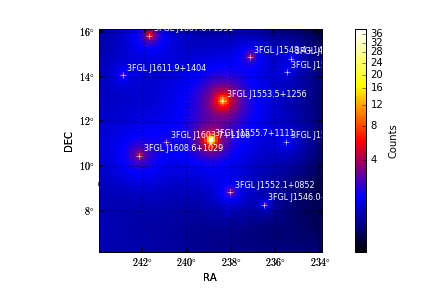

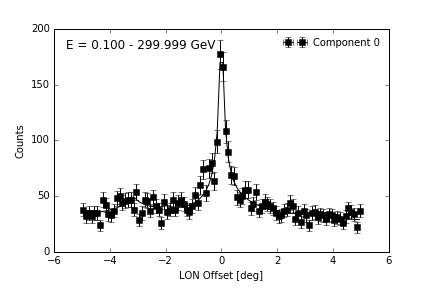

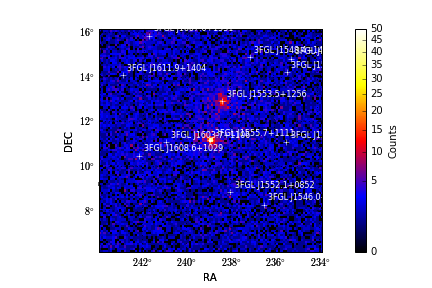

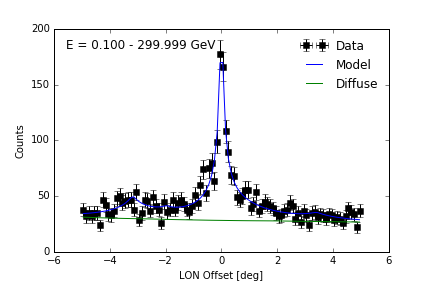

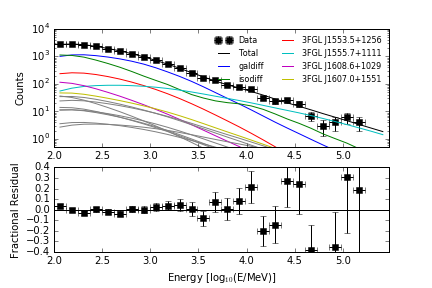

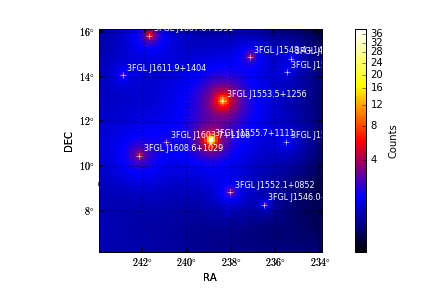

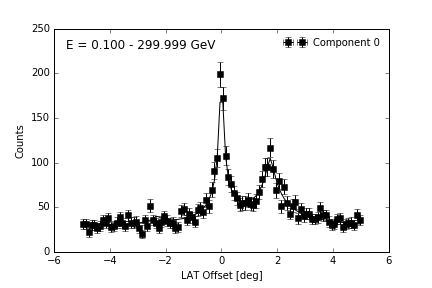

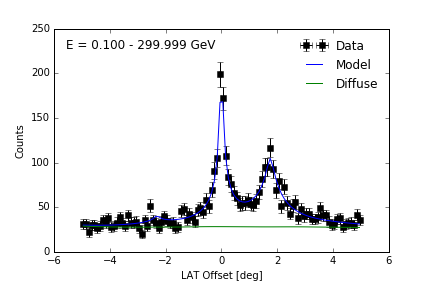

In [23]:
for png in pngs:
    my_image = Image(png)
    display(my_image)

### Reading in the results

Since the results are saved, you can load them back up at any point (you can also get to these within python).

In [24]:
import yaml

In [25]:
ls *.yaml

config.yaml  results.yaml


In [26]:
c = yaml.load(open('results.yaml'))

Here's all the info that you have access to.

In [27]:
c['sources']['3FGL J1555.7+1111'].keys()

['eflux100',
 'Source_Name',
 'flux10000',
 'eflux10000_ul95',
 'spatial_pars',
 'SpatialModel',
 'flux10000_ul95',
 'flux100',
 'flux100_ul95',
 'flux_ul95',
 'offset_dec',
 'dfde1000',
 'ts',
 'eflux1000_ul95',
 'lnlprofile',
 'eflux100_ul95',
 'offset_glat',
 'dfde100',
 'eflux10000',
 'eflux1000',
 'ra',
 'SpatialType',
 'offset_glon',
 'glon',
 'flux1000_ul95',
 'offset_ra',
 'pivot_energy',
 'DEJ2000',
 'eflux',
 'glat',
 'dfde',
 'covar',
 'SpectrumType',
 'catalog',
 'assoc',
 'spectral_pars',
 'offset',
 'dfde10000',
 'class',
 'model_flux',
 'flux1000',
 'name',
 'extension',
 'eflux_ul95',
 'model_counts',
 'Npred',
 'flux',
 'RAJ2000',
 'sed',
 'params',
 'dec']

Let's take a look at the flux, spectral parameters, and TS.

In [31]:
c['sources']['3FGL J1555.7+1111']['flux']

[6.173796561508706e-08, 6.160593154525331e-09]

In [47]:
c['sources']['3FGL J1555.7+1111']['params']

{'Eb': [1491.38049316, nan],
 'alpha': [1.5317354225820274, 0.050664105885169786],
 'beta': [0.04372217272408818, 0.017612667071763836],
 'norm': [6.117268749635116e-12, 3.0686945710759533e-13],
 'spectrum_type': 'LogParabola'}

In [48]:
c['sources']['3FGL J1555.7+1111']['ts']

3003.9580834952067

The SED is in there as well.  We can plot it.

In [32]:
E = np.array(c['sources']['3FGL J1555.7+1111']['model_flux']['ecenter'])
dfde = np.array(c['sources']['3FGL J1555.7+1111']['model_flux']['dfde'])
dfde_hi = np.array(c['sources']['3FGL J1555.7+1111']['model_flux']['dfde_hi'])
dfde_lo = np.array(c['sources']['3FGL J1555.7+1111']['model_flux']['dfde_lo'])

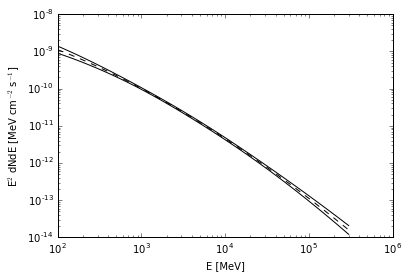

In [33]:
plt.loglog(10**E, (E**2)*dfde, 'k--')
plt.loglog(10**E, (E**2)*dfde_hi, 'k')
plt.loglog(10**E, (E**2)*dfde_lo, 'k')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dNdE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

If you want SED points, there's a function for that.  There are lots of options for this which you can set in the config file or from keyword arguments of the function itself.

In [34]:
gta.sed('3FGL J1555.7+1111')

2015-11-04 14:59:13 - GTAnalysis - INFO - Computing SED for 3FGL J1555.7+1111
INFO:GTAnalysis:Computing SED for 3FGL J1555.7+1111
2015-11-04 14:59:14 - GTAnalysis - INFO - Fixing parameters for 3FGL J1555.7+1111     : ['norm', 'alpha', 'beta']
INFO:GTAnalysis:Fixing parameters for 3FGL J1555.7+1111     : ['norm', 'alpha', 'beta']
2015-11-04 14:59:14 - GTAnalysis - INFO - Fixing parameters for 3FGL J1553.5+1256     : ['norm']
INFO:GTAnalysis:Fixing parameters for 3FGL J1553.5+1256     : ['norm']
2015-11-04 14:59:14 - GTAnalysis - INFO - Fixing parameters for 3FGL J1603.7+1106     : ['Prefactor']
INFO:GTAnalysis:Fixing parameters for 3FGL J1603.7+1106     : ['Prefactor']
2015-11-04 14:59:14 - GTAnalysis - INFO - Fixing parameters for 3FGL J1552.1+0852     : ['Prefactor']
INFO:GTAnalysis:Fixing parameters for 3FGL J1552.1+0852     : ['Prefactor']
2015-11-04 14:59:14 - GTAnalysis - INFO - Fixing parameters for isodiff               : ['Normalization']
INFO:GTAnalysis:Fixing parameters for 

{'Npred': array([  1.26613283e+02,   8.02443098e+01,   9.95766218e+01,
          1.02836547e+02,   8.14785919e+01,   5.99193358e+01,
          7.87127385e+01,   9.68411706e+01,   8.11350501e+01,
          6.30871721e+01,   5.56431766e+01,   4.64391120e+01,
          3.63706162e+01,   4.49568306e+01,   2.80810576e+01,
          2.07131056e+01,   2.71811651e+01,   1.36810428e+01,
          1.38665851e+01,   1.51518376e+01,   1.36582421e+01,
          5.96907393e+00,   2.22826260e+00,   3.96269244e+00,
          5.97164392e+00,   2.00857922e+00,   1.54641743e-08,
          2.02427271e-08]),
 'config': {'bin_index': 2.0, 'use_local_index': False},
 'dfde': array([  5.58837868e-10,   1.88894958e-10,   1.37168072e-10,
          8.88233247e-11,   4.58032272e-11,   2.23871658e-11,
          2.00319890e-11,   1.70431074e-11,   1.00416813e-11,
          5.60408814e-12,   3.62204855e-12,   2.24903196e-12,
          1.32330114e-12,   1.23511024e-12,   5.77897119e-13,
          3.16726478e-13,   3.

You can save the state to the yaml file or you can just access it directly.  This is also the way to get at the dictionary for any individual source.

In [35]:
src = gta.roi.get_source_by_name('3FGL J1555.7+1111')[0]

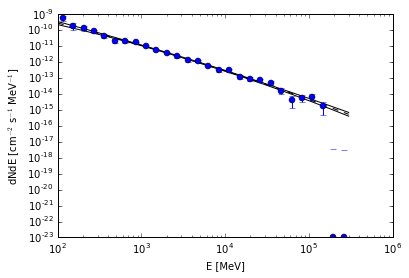

In [36]:
plt.loglog(10**E, dfde, 'k--')
plt.loglog(10**E, dfde_hi, 'k')
plt.loglog(10**E, dfde_lo, 'k')
plt.errorbar(10**np.array(src.data['sed']['ecenter'])
             ,src.data['sed']['dfde'], 
             yerr=src.data['sed']['dfde_err'], fmt ='o')
plt.xlabel('E [MeV]')
plt.ylabel(r'dNdE [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
plt.show()

Looks like those last two points should be upper limits.  Let's plot those instead.

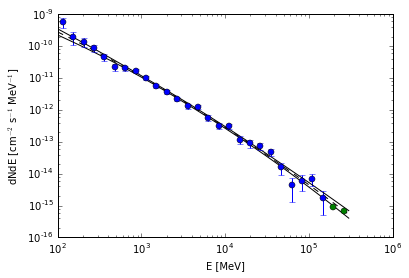

In [37]:
plt.loglog(10**E, dfde, 'k--')
plt.loglog(10**E, dfde_hi, 'k')
plt.loglog(10**E, dfde_lo, 'k')
plt.errorbar(10**np.array(src.data['sed']['ecenter'][:-2])
             ,src.data['sed']['dfde'][:-2], 
             yerr=src.data['sed']['dfde_err'][:-2], fmt ='o')
plt.plot(10**np.array(src.data['sed']['ecenter'][-2:])
             ,src.data['sed']['dfde_ul95'][-2:], 'o')
plt.xlabel('E [MeV]')
plt.ylabel(r'dNdE [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
plt.show()

### Summary

There is a lot of other functionality and you should look through the docs for more details.  You can also inspect the GTAnalysis object for some of these (like TS Maps, extension tests, and using event types).  Advanced threads are coming.